I'll use the randomly connected Hopfield model (say, with 50% of the non-lattice connections added to the bare lattice connectivity) with deterministic update rule. I store 10 MNIST digit examples (one digit image per digit class). I'll look at dynamical behavior starting from stored patterns and from noisy versions (randomly flipped bits) of the stored patterns.

## Imports...

In [1]:
# enables plotting inline of Jupyter notebooks
%matplotlib inline

# autoreloading of modules
%load_ext autoreload
%autoreload 2

import numpy as np
import math

from network import HopfieldNetwork
from pattern_tools import PatternFactory
import pattern_tools, plot_tools, util

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

## Storing MNIST Digit Patterns

We find and store one of each of the MNIST digits, which we will use to classify all other digits.

In [2]:
# load the MNIST data
images, labels = util.load_mnist()

Preprocessing data by thresholding values greater than a constant $c$ to 1 and values less than or equal to $c$ to -1.

In [3]:
# change this to change thresholding preprocessing behavior
c = 1

# bipolarizing the MNIST digits
images = np.asarray(2 * (images >= c) - 1, dtype=np.int)

Now, we look for a single digit example from each digit class (0 through 9).

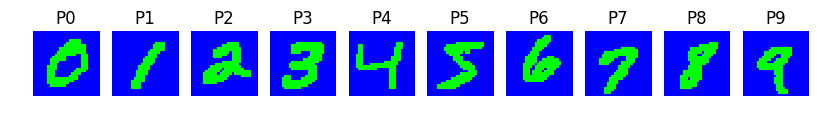

In [4]:
# get one of each of the MNIST digits by label (0 through 9)
images_to_store = []
# look for a digit example by i = 0, ..., 9
for i in range(10):
    for idx, img in enumerate(images):
        # if the label matches the current digit we're looking for
        if labels[idx] == i:
            # store the corresponding image
            images_to_store.append(img)
            break
            
# plot the selected MNIST digit patterns (thresholded and bipolarized)
plot_tools.plot_pattern_list(images_to_store)

Now, we create the randomly connected Hopfield network (with 50% of the non-lattice edges added to the bare lattice connectivity), store the images we chose from the MNIST data, and visualize the matrix of network weights.

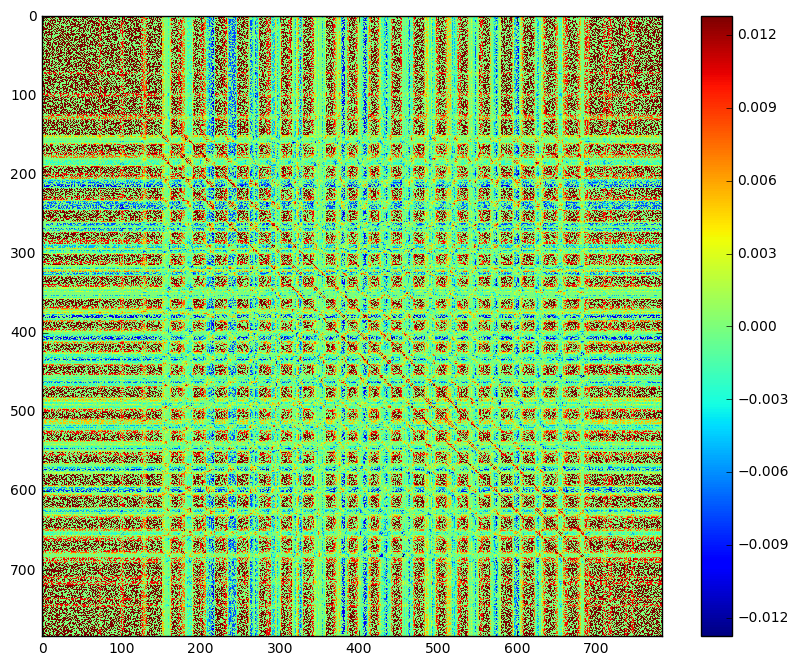

In [7]:
# create fully connected Hopfield network with 28 x 28 neurons
nn = HopfieldNetwork(nr_neurons=28*28, connectivity='random', percent_connect=0.5)

# store the patterns in the network
nn.store_patterns(images_to_store)

# take a look at network weights
plot_tools.plot_network_weights(hopfield_network=nn)